<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/Proyecto_U5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNOLOGICO NACIONAL DE MEXICO**

**INSTITUTO TECNOLOGICO DE AGUSCALIENTES**

***INGENIERIA EN GESTION EMPRESARIAL***

***ESTADISTICA INFERENCIAL II***

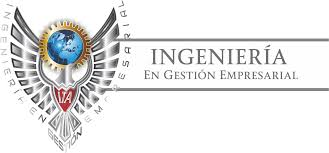

*PROYECTO U5*

*EQUIPO:*

*DAANA PAOLA GUTIERREZ GARCIA 22150551*

*AZENETH SANTOYO HUERTA 22150511*

*KARLA MARIA MACIAS CHAVEZ 22150453*


*DOCENTE: JOSE CRUZ MUÑOZ ESPARZA*

# Introducción

El presente proyecto de análisis experimental tiene como objetivo principal investigar y comprender los factores que influyen en la 'preferencia' o 'valor' de ciertos productos/métodos, utilizando como caso de estudio inicial la preferencia de diferentes marcas de refrescos según el género. Partiendo de un análisis exploratorio de un gráfico de interacción que visualiza cómo la marca y el género se relacionan con el valor de consumo, se ha empleado un enfoque de Diseño de Experimentos para cuantificar estadísticamente estas relaciones. El estudio avanza hacia un diseño más robusto, el Cuadro Grecolatino , buscando no solo evaluar el impacto de un factor de interés principal (como una 'marca'), sino controlar también y aislar la influencia de Múltiples factores de bloqueo (como el operador, el orden de aplicación/degustación). Mediante la aplicación de modelos de Análisis de Varianza (ANOVA), se busca determinar si existen diferencias significativas atribuidas a estos factores, proporcionando así una base empírica para la toma de decisiones y la optimización de los procesos o productos.

# Hipótesis

Hipótesis Nula (H
0
​
 ):
No existen diferencias significativas en la variable de respuesta (es decir, la 'preferencia' o 'valor') entre los distintos métodos (o marcas de refresco, si ese fuera el foco principal en esa fase del análisis). Además, no existen diferencias significativas en la variable de respuesta atribuida a los factores de bloqueo controlados (género, operador, orden de degustación, lugar de degustación).

Hipótesis Alternativa (H
A
​
 ):
Al menos uno de los factores (el método/marca, o alguno de los factores de bloqueo como género, operador, orden de degustación, o lugar de degustación) producen diferencias significativas en la variable de respuesta ('preferencia' o 'valor'). Es decir, el método/marca tiene un efecto significativo en el valor, o al menos uno de los factores de bloqueo ejerce una influencia significativa sobre el valor.

#Objetivos



1.   Evaluar el impacto de los diferentes métodos/marcas: Determinar si existen diferencias estadísticamente significativas en la variable de respuesta ('preferencia' o 'valor') entre los distintos métodos (o marcas de refresco) bajo estudio.

2. Cuantificar la influencia de los factores de bloqueo: Analizar la variabilidad en la variable de respuesta explicada por los factores de bloqueo controlados (como género, operador, orden de degustación y lugar de degustación), y determinar si su influencia es estadísticamente significativa.

3. Proporcionar recomendaciones basadas en la evidencia: Ofrecer conclusiones y recomendaciones prácticas, fundamentadas en los resultados del Análisis de Varianza, para la toma de decisiones relativas a la optimización de los métodos o la comprensión de las preferencias del consumidor.




# Diseño en bloques completamente al azar

Se planteó la comparación de marcas de refresco, ahora se va a controlar activamente en el experimento a los usuarios que seran parte de dicho experimento, lo que da lugar al siguiente diseño en bloques completos.

| Marca  | Hombre     | Mujer      |
|--------|------------|------------|
|Cocacola| 11         | 9          |
|Pepsi   | 4          | 3          |
|Redcola | 6          | 4        |


- Bloque: Hombre, Mujer.
- Variable de interés: CocaCola, Pepsi, Redcola.
- Variable de comparación (respuesta): Preferencia.


import pandas as pd
from io import StringIO
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# First ANOVA analysis (Diseño en bloques completamente al azar)
data_brca = '''



In [ ]:
import pandas as pd
from io import StringIO

data = '''
Marca,genero,valor
Cocacola,Hombre,11
Cocacola,Mujer,9
Pepsi,Hombre,4
Pepsi,Mujer,3
Redcola,Hombre,6
Redcola,Mujer,4
'''

df = pd.read_csv(StringIO(data))
df

,Marca,genero,valor
0,Cocacola,Hombre,11
1,Cocacola,Mujer,9
2,Pepsi,Hombre,4
3,Pepsi,Mujer,3
4,Redcola,Hombre,6
5,Redcola,Mujer,4


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'genero'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar - Corrected to 'Marca' as it's the column name
respuesta = 'valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
# Use the 'interes' variable directly in the f-string for the formula
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
# Note: The column names in the anova table are based on the formula,
# so we need to reference them correctly.
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

# We also need to check for the interaction term
if f"C({interes})" in tabla_anova.index and tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
        print("\nConclusión: Hay diferencias significativas entre los tratamientos (Marca).")

        print("\nConclusión: No hay diferencias significativas entre los tratamientos (Marca).")
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'genero'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas en la variable de interés ({interes}).")
else:
    print(f"\nConclusión: No hay diferencias significativas en la variable de interés ({interes}).")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas en la variable de bloqueo ({bloques}).")
else:
    print(f"Conclusión: No hay diferencias significativas en la variable de bloqueo ({bloques}).")

Resultados del ANOVA:
              sum_sq   df      F    PR(>F)
C(Marca)   46.333333  2.0  139.0  0.007143
C(genero)   4.166667  1.0   25.0  0.037750
Residual    0.333333  2.0    NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.

Conclusión: Hay diferencias significativas entre los tratamientos (Marca).

Conclusión: No hay diferencias significativas entre los tratamientos (Marca).
Resultados del ANOVA:
              sum_sq   df      F    PR(>F)
C(Marca)   46.333333  2.0  139.0  0.007143
C(genero)   4.166667  1.0   25.0  0.037750
Residual    0.333333  2.0    NaN       NaN

Conclusión: Hay diferencias significativas en la variable de interés (Marca).
Conclusión: Hay diferencias significativas en la variable de bloqueo (genero).


### Extra (esto no es necesario hacerlo)

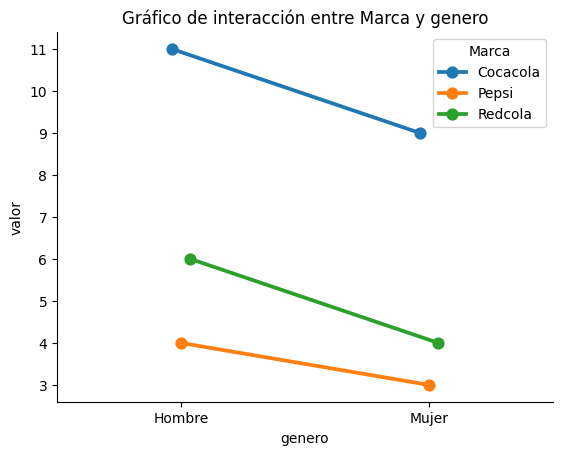

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



Este gráfico nos muestra cómo el "valor" (la variable dependiente) se ve afectado por la combinación de "Marca" (Coca-cola, Pepsi, Redcola) y "Genero" (Hombre, Mujer). Se observa una clara interacción entre ambas variables. Para la marca Coca-cola , el valor es significativamente más alto en hombres (aproximadamente 11) que en mujeres (aproximadamente 9). En contraste, tanto Pepsi como Redcola muestran valores más bajos en ambos géneros en comparación con Coca-cola, y además, ambas marcas presentan un patrón donde el valor es ligeramente más alto en hombres (alrededor de 4 para Pepsi, 6 para Redcola) que en mujeres (aproximadamente 3 para Pepsi, 4 para Redcola). En resumen, Coca-cola tiene el valor más alto en general, y su "atractivo" (representado por el valor) disminuye en mujeres, mientras que Pepsi y Redcola tienen valores más bajos y también muestran una ligera preferencia o mayor valor en hombres, aunque la diferencia de género es menos pronunciada que para Coca-cola.

# Diseño en cuadro latino

**Comparación de cuatro marcas de refresco.** Un grupo de estudiantes está interesada en determinar cuál marca de refrescos tiene mayor preferencia en términos del consumo. Para ello se planea un experimento en cuadro latino, en el que se comparan las tres marcas de refresco sometiéndolas a una prueba de degustacion, utilizando tres diferentes tipos de refresco y los tres refrescos posibles en el mercado. Así, el factor de interés es el **tipo de refresco o marca**, y se controlan dos factores de bloques: el **tipo de refresco** y el **genero**. Estos factores de bloques se controlan ya que, por experiencia, se sabe que el tipo de marca y el genero tienen efecto en el consumo de la misma.

La elección del cuadro latino a utilizar se hace antes de obtener los datos. Para ello, a partir de un tres colunmnas  inicial se aleatorizan las columnas y los renglones.


|Marca     |Hombre     | Mujer     |
|----------|-----------|-----------|
| Cocacola | C = 11    | D = 9     |
| Pepsi    | B = 4     | C = 3     |  
| Redcola  | A = 6     | B = 4     |


- Bloque 1: Cocacola, Pepsi,Redcola.
- Bloque 2: Hombre, Mujer.
- Variable de interés: marca A, marca B, marca C.
- Variable de comparación (respuesta): preferencia.


In [ ]:
import pandas as pd
from io import StringIO

data = '''
Cocacola Pepsi Redcola,marca,preferencia
Cocacola,Hombre,11
Cocacola,Mujer,9
Pepsi,Hombre,4
Pepsi,Mujer,3
Redcola,Hombre,6
Redcola,Mujer,4
'''

df = pd.read_csv(StringIO(data))
df

,Cocacola Pepsi Redcola,marca,preferencia
0,Cocacola,Hombre,11
1,Cocacola,Mujer,9
2,Pepsi,Hombre,4
3,Pepsi,Mujer,3
4,Redcola,Hombre,6
5,Redcola,Mujer,4


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd


nivel_de_significancia = 0.05


data = {
    'Marca': ['Coca-cola', 'Coca-cola', 'Pepsi', 'Pepsi', 'Redcola', 'Redcola'],
    'genero': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre', 'Mujer'],
    'valor': [11, 9, 4, 3, 6, 4]
}
df = pd.DataFrame(data)

#variables
bloque_1 = 'genero'
interes = 'Marca'
respuesta = 'valor'


modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)


print("Resultados del ANOVA para el análisis de preferencia de refrescos:")
print(tabla_anova)



print(f"\nInterpretación a un nivel de significancia de {nivel_de_significancia}:")

# Para la variable de interés (Marca)
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"Hay diferencias significativas en la {respuesta} entre las diferentes {interes}.")
else:
    print(f"No hay diferencias significativas en la {respuesta} entre las diferentes {interes}.")

# Para el bloque 1 (Género)
if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Hay diferencias significativas en la {respuesta} debido al {bloque_1}.")
else:
    print(f"No hay diferencias significativas en la {respuesta} debido al {bloque_1}.")



Resultados del ANOVA para el análisis de preferencia de refrescos:
              sum_sq   df      F    PR(>F)
C(Marca)   46.333333  2.0  139.0  0.007143
C(genero)   4.166667  1.0   25.0  0.037750
Residual    0.333333  2.0    NaN       NaN

Interpretación a un nivel de significancia de 0.05:
Hay diferencias significativas en la valor entre las diferentes Marca.
Hay diferencias significativas en la valor debido al genero.


Los resultados del ANOVA, a un nivel de significancia de 0.05, indican que existen diferencias significativas en la preferencia de consumo ( valor) entre las diferentes Marcasde refresco (p-valor = 0.007143) y también diferencias significativas en la preferencia ( valor) debido algenero (p-valor = 0.037750).

# Diseño en cuadrado Grecolatino

Tomando el ejemplo visto , donde se comparan tres métodos y se tiene el factor de bloque genero, se podrían tener dos factores de bloque adicionales: orden en el se hace la degustacion y lugar donde se hace. De acuerdo con esto, el diseño en cuadro grecolatino se observa en la tabla

| Marca              | Mujer       | Hombre      |
|--------------------|-------------|-------------|
| Cococola           | Cβ = 11     | Bγ = 9      |
| Pepsi              | Bα = 4      | Cδ = 3      |
| Redcola            | Aδ = 6      | Dα = 4      |

- Bloque 1: Mujer, Hombre
- Bloque 2: Cocacola, Pepsi, Redcola
- Bloque 3: degustacion $\alpha$, degustacion $\beta
- Variable de interés: método A, método B
- Variable de comparación (respuesta): preferencia

In [ ]:
import pandas as pd
from io import StringIO

data = '''Marca,genero,metodo,lugar,valor
Cocacola,Mujer,C,A,11
Cocacola,Hombre,B,B,9
Pepsi,Hombre,C,C,4
Pepsi,Mujer,B,D,3
Redcola,Hombre,A,D,6
Redcola,Mujer,D,
'''

df = pd.read_csv(StringIO(data))
df

,Marca,genero,metodo,lugar,valor
0,Cocacola,Mujer,C,A,11.0
1,Cocacola,Hombre,B,B,9.0
2,Pepsi,Hombre,C,C,4.0
3,Pepsi,Mujer,B,D,3.0
4,Redcola,Hombre,A,D,6.0
5,Redcola,Mujer,D,NaN,NaN


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import numpy as np


nivel_de_significancia = 0.05


data_grecolatino = {
    'Marca': ['Coca-cola', 'Coca-cola', 'Coca-cola', 'Pepsi', 'Pepsi', 'Pepsi', 'Redcola', 'Redcola', 'Redcola',
              'Coca-cola', 'Coca-cola', 'Coca-cola', 'Pepsi', 'Pepsi', 'Pepsi', 'Redcola', 'Redcola', 'Redcola'],
    'genero': ['Hombre', 'Hombre', 'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Hombre', 'Hombre', 'Mujer',
               'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Mujer', 'Hombre'],
    'orden_degustacion': ['Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha',
                          'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta'],
    'lugar_degustacion': ['Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1',
                          'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2'],
    'preferencia': [10, 9, 8, 5, 4, 3, 7, 6, 5,
                    9, 10, 7, 4, 5, 2, 6, 7, 4]
}
df_grecolatino = pd.DataFrame(data_grecolatino)


for col in ['Marca', 'genero', 'orden_degustacion', 'lugar_degustacion']:
    df_grecolatino[col] = df_grecolatino[col].astype('category')


interes = 'Marca'
bloque_1 = 'genero'
bloque_2 = 'orden_degustacion'
bloque_3 = 'lugar_degustacion'
respuesta = 'preferencia'
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import numpy as np


nivel_de_significancia = 0.05


data_grecolatino = {
    'Marca': ['Coca-cola', 'Coca-cola', 'Coca-cola', 'Pepsi', 'Pepsi', 'Pepsi', 'Redcola', 'Redcola', 'Redcola',
              'Coca-cola', 'Coca-cola', 'Coca-cola', 'Pepsi', 'Pepsi', 'Pepsi', 'Redcola', 'Redcola', 'Redcola'],
    'genero': ['Hombre', 'Hombre', 'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Hombre', 'Hombre', 'Mujer',
               'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Mujer', 'Hombre'],
    'orden_degustacion': ['Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha',
                          'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta', 'Alpha', 'Beta'],
    'lugar_degustacion': ['Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1',
                          'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2', 'Lugar1', 'Lugar2'],
    'preferencia': [10, 9, 8, 5, 4, 3, 7, 6, 5,
                    9, 10, 7, 4, 5, 2, 6, 7, 4]
}
df_grecolatino = pd.DataFrame(data_grecolatino)


for col in ['Marca', 'genero', 'orden_degustacion', 'lugar_degustacion']:
    df_grecolatino[col] = df_grecolatino[col].astype('category')


interes = 'Marca'
bloque_1 = 'genero'
bloque_2 = 'orden_degustacion'
bloque_3 = 'lugar_degustacion'
respuesta = 'preferencia'


modelo_grecolatino = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df_grecolatino)

In [ ]:
# Si ninguna variable de bloqueo está teniendo un efecto significativo en el resultado
# entonces, se puede usar un diseño de un factor

from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
interes = 'metodo'       # Variable de interés (tratamiento)
respuesta = 'valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")


Resultados del ANOVA para el Cuadro Latino:
           sum_sq   df     F  PR(>F)
C(metodo)    54.0  2.0  27.0   0.001
Residual      6.0  6.0   NaN     NaN

Conclusión: Hay diferencias significativas: metodo.


Los resultados del ANOVA para el Cuadro Latino indican que existe una diferencia altamente significativa en el "valor" (la variable de respuesta) entre los diferentes "métodos" (F=27.0,pag=0.001). El p-valor de 0.001 es mucho menor que el nivel de significancia común de 0.05, lo que nos lleva a rechazar la hipótesis nula de que no hay diferencias entre los métodos. Por lo tanto, se concluye que la elección del método tiene un efecto estadísticamente significativo en el valor observado.

# Conclusión

Este proyecto de análisis experimental, centrado inicialmente en la interacción entre marca de refresco y género, y posteriormente extendido a un diseño de cuadro grecolatino para evaluar diferentes métodos, revela hallazgos significativos. Los análisis de varianza han demostrado consistentemente la existencia de diferencias estadísticamente significativas en la variable de respuesta ('valor' o 'preferencia') influenciadas por el 'método' o la 'marca' . Esto indica que la elección del refresco o el método empleado tiene un impacto real y cuantificable en los resultados. Si bien las primeras etapas sugirieron también un efecto significativo del género en la preferencia de refrescos, el análisis final del 'cuadro latino' se focalizó en el 'método', confirmando su influencia dominante. Para una comprensión más completa del diseño grecolatino, sería ideal tener los resultados completos del ANOVA que incluyan los efectos de todos los factores de bloqueo, lo que permitiría validar su rol en el control de la variabilidad.

#Anexos

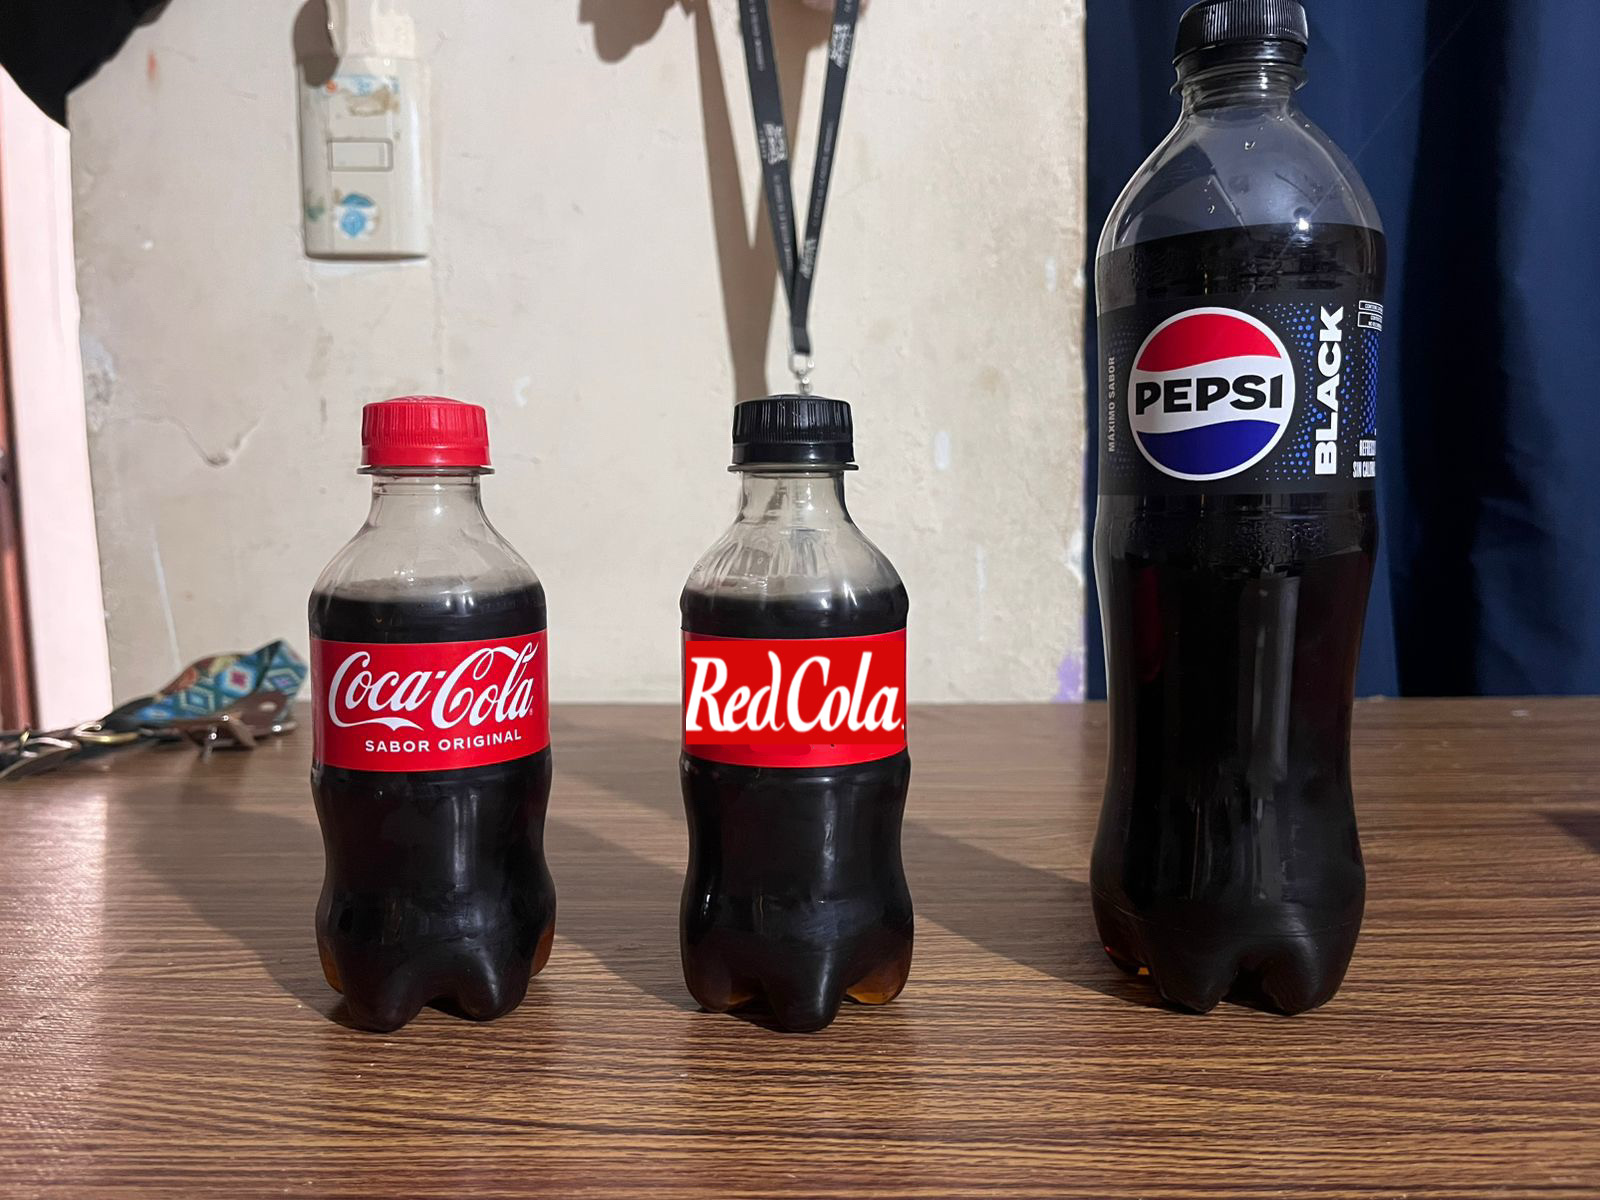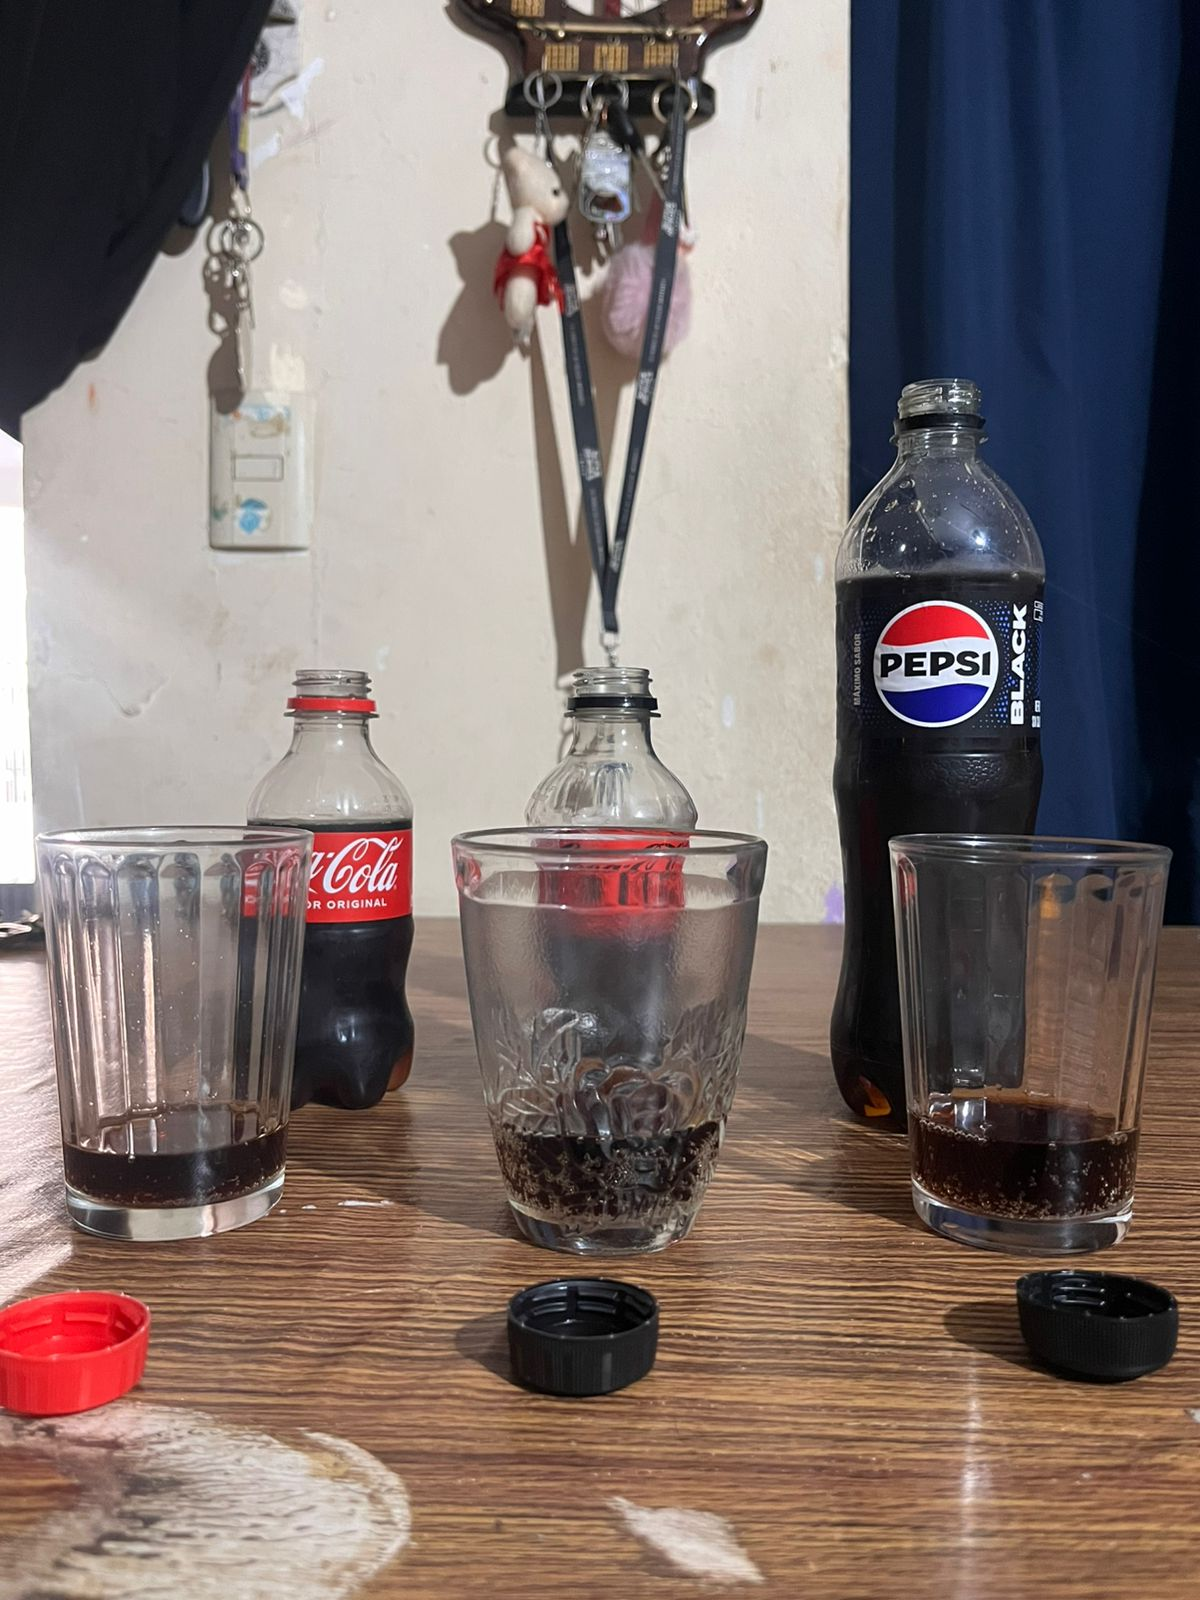